## Unveiling Sales Trends: Analyzing Walmart's Branch Performance with Python



# 
Project Introduction

1.Problem Statement: 
    
    Analyzing the sales data of Walmart to derive insights and trends that can help improve sales strategies.
 
2.Objectives:

     Understand sales patterns across different branches and product lines.
     Identify key factors influencing sales.
     Provide actionable recommendations based on the analysis.


####  Load the Data

In [38]:
import pandas as pd

# Load the dataset
df=pd.read_csv('WalmartSalesData.csv')

# Display the first few rows of the dataset
df.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


#### Data Cleaning

In [39]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values


Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [40]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Convert 'Time' to datetime format
df['Time'] = pd.to_datetime(df['Time']).dt.time

# Verify the data types
df.dtypes


C:\Users\Vinayak PC\AppData\Local\Temp\ipykernel_8172\300468457.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time']).dt.time


Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

In [41]:
# Check for duplicates
duplicates = df.duplicated().sum()

# Remove duplicates
df = df.drop_duplicates()

# Verify removal
new_duplicates = df.duplicated().sum()
duplicates, new_duplicates


(0, 0)

In [42]:
# General overview of the dataset
overview = df.describe(include='all')
overview


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
count,1000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000.00000,1000.000000,1000.000000,1000.00000
unique,1000,3,3,2,2,6,NaN,NaN,NaN,NaN,NaN,506,3,NaN,NaN,NaN,NaN
top,750-67-8428,A,Yangon,Member,Female,Fashion accessories,NaN,NaN,NaN,NaN,NaN,19:48:00,Ewallet,NaN,NaN,NaN,NaN
freq,1,340,340,501,501,178,NaN,NaN,NaN,NaN,NaN,7,345,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,55.672130,5.510000,15.379369,322.966749,2019-02-14 00:05:45.600000,NaN,NaN,307.58738,4.761905,15.379369,6.97270
min,NaN,NaN,NaN,NaN,NaN,NaN,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,NaN,NaN,10.17000,4.761905,0.508500,4.00000
25%,NaN,NaN,NaN,NaN,NaN,NaN,32.875000,3.000000,5.924875,124.422375,2019-01-24 00:00:00,NaN,NaN,118.49750,4.761905,5.924875,5.50000
50%,NaN,NaN,NaN,NaN,NaN,NaN,55.230000,5.000000,12.088000,253.848000,2019-02-13 00:00:00,NaN,NaN,241.76000,4.761905,12.088000,7.00000
75%,NaN,NaN,NaN,NaN,NaN,NaN,77.935000,8.000000,22.445250,471.350250,2019-03-08 00:00:00,NaN,NaN,448.90500,4.761905,22.445250,8.50000
max,NaN,NaN,NaN,NaN,NaN,NaN,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,NaN,NaN,993.00000,4.761905,49.650000,10.00000


In [43]:
 # What is the average rating for each product line ?
average_rating_per_product_line = df.groupby('Product line')['Rating'].mean().reset_index()

average_rating_per_product_line


,Product line,Rating
0,Electronic accessories,6.924706
1,Fashion accessories,7.029213
2,Food and beverages,7.113218
3,Health and beauty,7.003289
4,Home and lifestyle,6.837500
5,Sports and travel,6.916265


In [44]:
#  Which product line generates the highest revenue?

product_line_revenue = df.groupby('Product line')['Total'].sum().reset_index()
highest_revenue_product_line = product_line_revenue.loc[product_line_revenue['Total'].idxmax()]

highest_revenue_product_line


Product line    Food and beverages
Total                    56144.844
Name: 2, dtype: object

In [45]:
# Is there a difference in average sales between members and normal customers?

average_sales_by_customer_type = df.groupby('Customer type')['Total'].mean().reset_index()

average_sales_by_customer_type


,Customer type,Total
0,Member,327.791305
1,Normal,318.122856


#### Exploratory Data Analysis


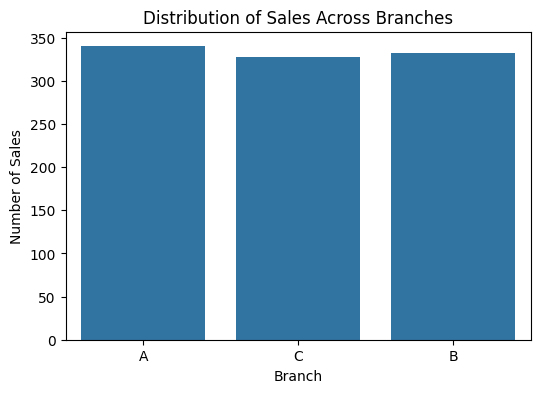

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of sales across branches
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Branch')
plt.title('Distribution of Sales Across Branches')
plt.xlabel('Branch')
plt.ylabel('Number of Sales')
plt.show()


In [47]:
# How does the sales performance vary over different days of the week?

# Extract day of the week from the 'Date' column
df['Day of Week'] = df['Date'].dt.day_name()

# Calculate total sales for each day of the week
sales_by_day_of_week = df.groupby('Day of Week')['Total'].sum().reset_index()

# Reorder the days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_by_day_of_week['Day of Week'] = pd.Categorical(sales_by_day_of_week['Day of Week'], categories=days_order, ordered=True)
sales_by_day_of_week = sales_by_day_of_week.sort_values('Day of Week')

sales_by_day_of_week


,Day of Week,Total
1,Monday,37899.0780
5,Tuesday,51482.2455
6,Wednesday,43731.1350
4,Thursday,45349.2480
0,Friday,43926.3405
2,Saturday,56120.8095
3,Sunday,44457.8925


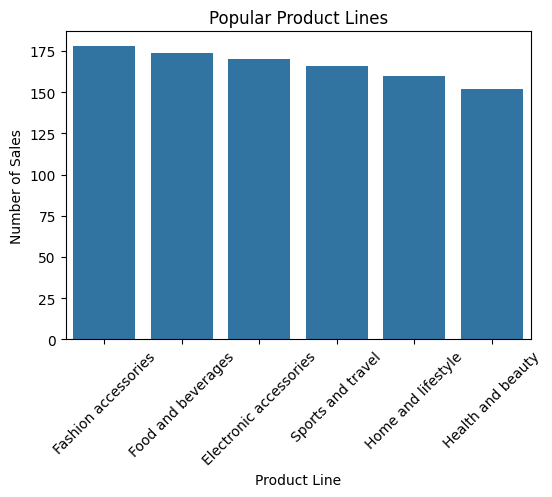

In [48]:
# Popular product lines
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Product line', order=df['Product line'].value_counts().index)
plt.title('Popular Product Lines')
plt.xlabel('Product Line')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.show()


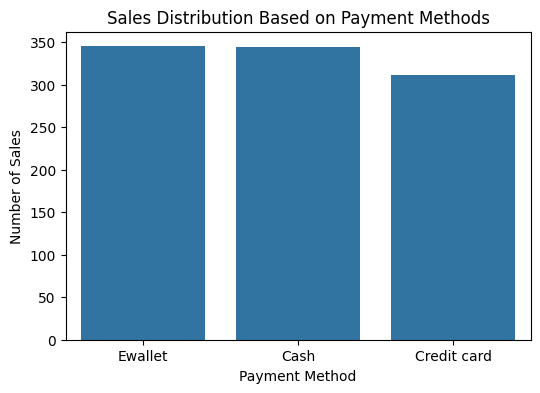

In [49]:
# Sales distribution based on payment methods
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Payment')
plt.title('Sales Distribution Based on Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Number of Sales')
plt.show()


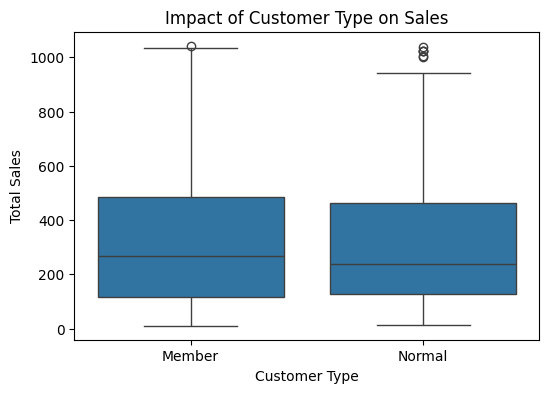

In [50]:
# Impact of customer type on sales
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Customer type', y='Total')
plt.title('Impact of Customer Type on Sales')
plt.xlabel('Customer Type')
plt.ylabel('Total Sales')
plt.show()


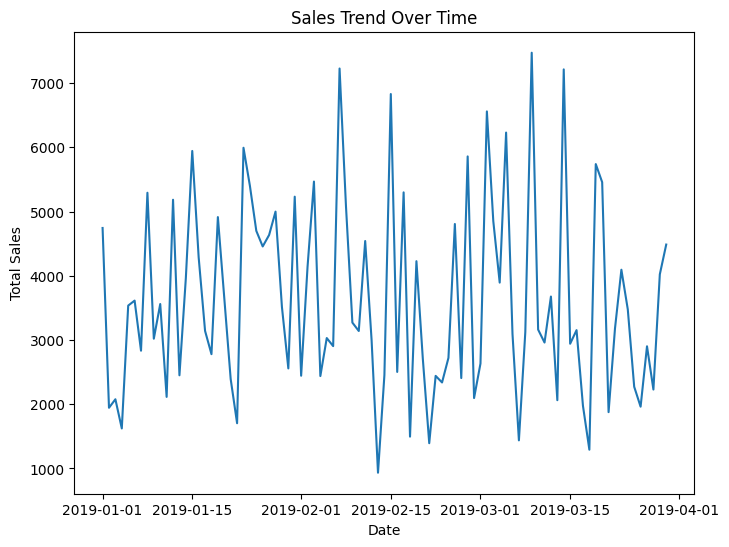

In [51]:
# Sales trend over time
df_grouped_date = df.groupby('Date').agg({'Total': 'sum'}).reset_index()

plt.figure(figsize=(8,6))
sns.lineplot(data=df_grouped_date, x='Date', y='Total')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()


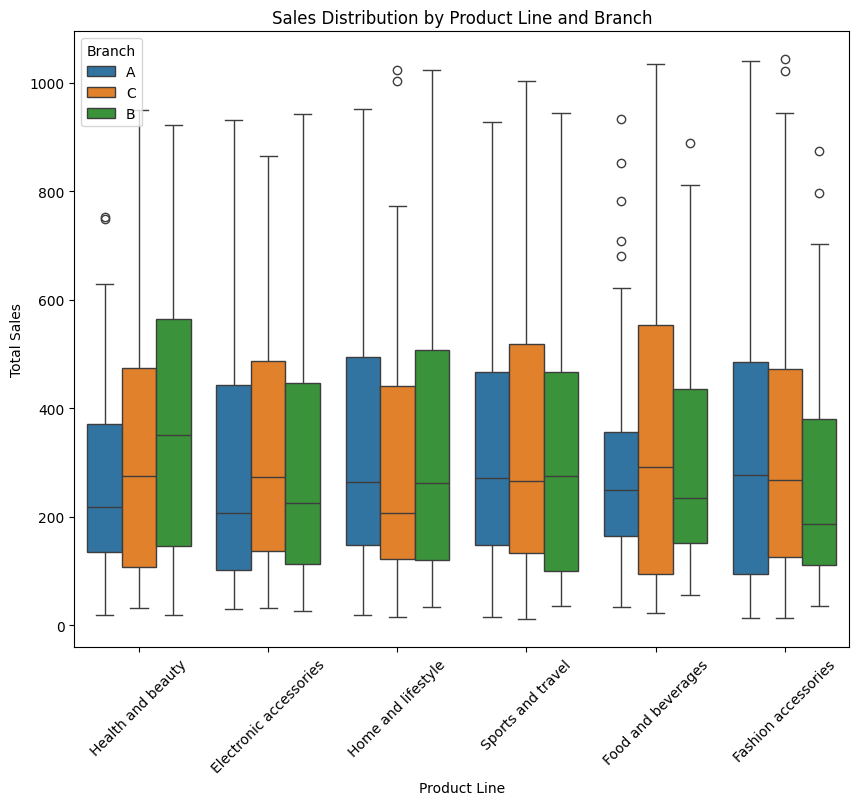

In [52]:
# Sales distribution by product line and branch
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x='Product line', y='Total', hue='Branch')
plt.title('Sales Distribution by Product Line and Branch')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


#### Model Development and Evaluation

In [53]:
# Split the data into features and target variable
X = df.drop('Rating', axis=1)  # Assuming 'Rating' is the target variable
y = df['Rating']

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [55]:
# Drop columns that won't be used for modeling
df = df.drop(columns=['Invoice ID', 'Date', 'Time'])

In [56]:
# Convert categorical variables to dummy variables
df = pd.get_dummies(df, drop_first=True)

In [57]:
# Define the target variable and features
X = df.drop(columns=['Total'])
y = df['Total']

In [58]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
# Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [60]:
# Predict using the Linear Regression model
y_pred_lr = lr_model.predict(X_test)

In [61]:
# Evaluate the Linear Regression model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

In [62]:
print(f'Linear Regression MSE: {mse_lr}')
print(f'Linear Regression R2 Score: {r2_lr}')

Linear Regression MSE: 1.6015454097796982e-26
Linear Regression R2 Score: 1.0


In [63]:
# Train a Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [64]:
# Predict using the Random Forest Regression model
y_pred_rf = rf_model.predict(X_test)

In [65]:
# Evaluate the Random Forest Regression model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [66]:
print(f'Random Forest Regression MSE: {mse_rf}')
print(f'Random Forest Regression R2 Score: {r2_rf}')

Random Forest Regression MSE: 1.595240725924125
Random Forest Regression R2 Score: 0.9999754800939074


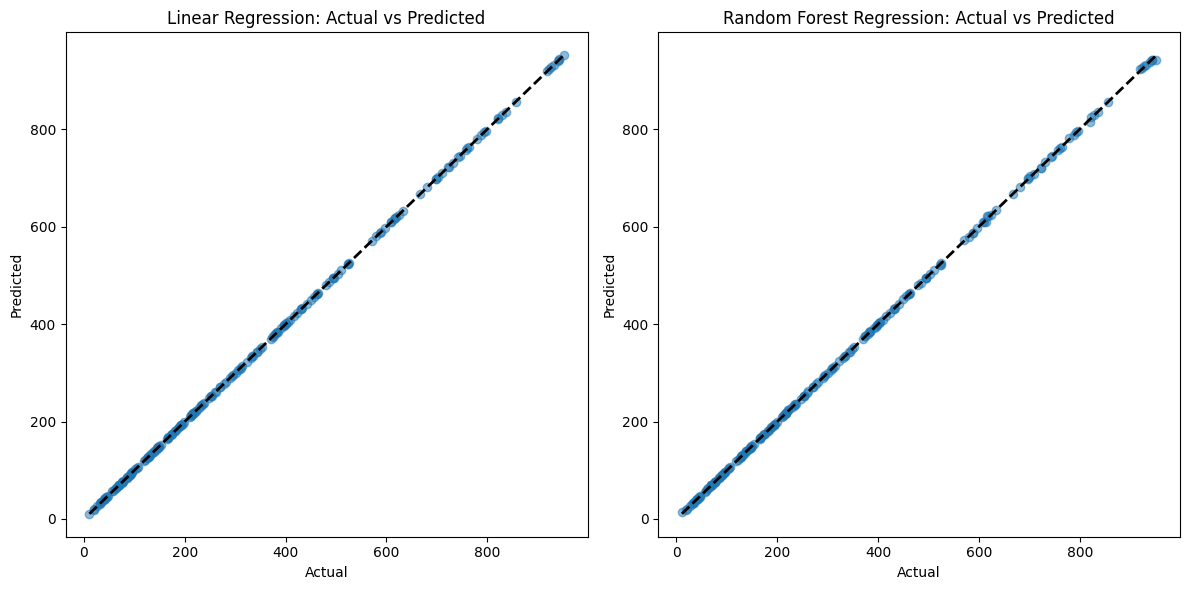

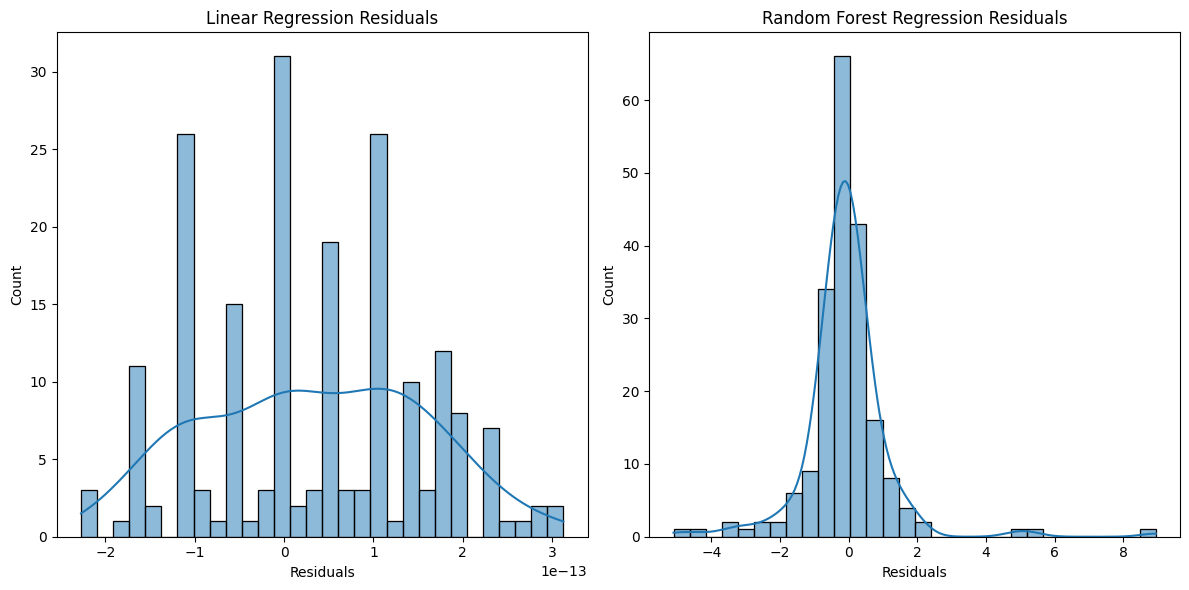

In [67]:

# Plot the predictions vs actual values for Linear Regression and Random Forest Regression
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs Predicted')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Regression: Actual vs Predicted')

plt.tight_layout()
plt.show()

# Plot the residuals for Linear Regression and Random Forest Regression
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
residuals_lr = y_test - y_pred_lr
sns.histplot(residuals_lr, kde=True, bins=30)
plt.xlabel('Residuals')
plt.title('Linear Regression Residuals')

plt.subplot(1, 2, 2)
residuals_rf = y_test - y_pred_rf
sns.histplot(residuals_rf, kde=True, bins=30)
plt.xlabel('Residuals')
plt.title('Random Forest Regression Residuals')

plt.tight_layout()
plt.show()



